* **The Statistical Tests Lesson consists of 3 units.**
* By the end of this lesson, you should be able to:
  * Use the concepts within a Statistical Test
  * Use and interpret statistical tests including Shapiro-Wilk, Chi-Squared, T-test, Paired T-Test, ANOVA, Mann-Whitney, Wilcoxon and Kruskal-Wallis test

### Objective

  * Use the concepts within a Statistical Test
  * Use and interpret statistical Shapiro-Wilk and Chi-Squared tests

* We will use Pandas and Pingouin (an open-source statistical package based mostly on Pandas and NumPy) libraries in this lesson.

 **Why do we study Statistical Tests?**
  * Because we can determine the differences or similarities between groups. We can also evaluate if a predictor variable is statistically important to a target variable.
  * A difference between groups can sometimes be seen or measured but exists due to random chance. Statistical significance is a determination that a relationship between two or more variables is caused by something other than chance.

### Additional Context Learning

* We encourage you to:
  * Add **code cells and try** other options, play around with parameter values in a function/method, or consider additional function parameters etc.
  * Also, **add your comments** to the cells. It can help you to consolidate your learning. 

* Parameters in given function/method
  * As you may expect, a given function in a package may contain multiple parameters. 
  * Some of them are mandatory to declare. Some have pre-defined values, and some are optional. We will cover the most common parameters used in Data Analytics for a particular function/method. 
  * However, you may seek additional information in the respective package documentation, where you will find instructions on how to use a given function/method. The studied packages are open source, so this documentation is public.
  * **For Pandas, the link is [here](https://pandas.pydata.org/) and for Pingouin [here](https://pingouin-stats.org/api.html)**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pingouin as pg
import scipy

### Statistical Tests Overview

A statistical test has a mechanism to make a decision about a process. 
* **The idea is to see if there is enough evidence to accept or reject a hypothesis about the process.**

### Hypothesis Testing

Hypothesis testing is a way of forming opinions or conclusions from the data we collect.

* The data is used to choose between **two choices**, aka hypotheses or statements. In practical terms, the reasoning is done by comparing what we have observed to what we expected. 
* The available data will typically be a sample of the entire population.

  * There is a **Null Hypothesis (H<sub>0</sub>)**, which consists of a statement about the sample data used. Typically it says there is no difference between groups.
  * An **Alternative Hypothesis (H<sub>1</sub>)** is typically the research question and states that there is a difference between groups.

### Significance Level (alpha)

The `Significance Level, or alpha, is the probability of rejecting the null hypothesis when it is true.`
* This means the percentage of risk we are okay to take while rejecting the null hypothesis.
* This is a percentage that the researcher can set; however, it is frequently set at 5%, meaning there is a 5 in 100 chance of rejecting the null hypothesis when it is, in fact, true.
  * However, depending on the topic you are researching (typically, high stakes), you may be more conservative and select a lower alpha level. For example, if you are testing a new drug that will cure cancer, you want to be very sure about your conclusions

### Test Statistic

A Statistical test works by measuring a test statistic, which is a number that explains how different the relationship between the variables in your test is.
* The method to calculate a test statistic varies between tests; for example, the formula for a test with two samples differs from a test with three samples. The test statistic compares differences between the samples.

### P-value

The `p-value is considered a tool for deciding whether to reject the null hypothesis`.

* In a simple definition, a `p-value is a probability that the null hypothesis is True`. The `smaller p-value, the stronger the evidence we have in favour of the alternative hypothesis`. We will not focus on how it is calculated, like which statistics tables are used; let's keep it simple for the moment.

* Once you have a p-value and alpha (or Significance level), you are in a position to make a statistical conclusion and interpret a statistical test.
  * If the `p-value is lower than the alpha, you have enough evidence to reject the null hypothesis`(H<sub>0</sub>)
  * If the `p-value is not lower than alpha, you do not have enough evidence to reject the null hypothesis`

### Shapiro-Wilk

The Shapiro-Wilk tests if a given data is **normally distributed**
* The null hypothesis states that the population is normally distributed.  The alternative hypothesis states that the population is not normally distributed
* Thus, **`if the p-value is less than the chosen alpha level (typically set at 0.05), the null hypothesis is rejected, and there is evidence that the data tested is not normally distributed.`

First, let's generate some data to illustrate the concepts over the lesson, using the libraries we have learned so far

In [17]:
from scipy.stats import skewnorm
np.random.seed(seed=1)
size=200

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-2.613,0.987,-0.099,36.250,0.864,43.249,38.396,0,20
1,0.153,0.570,-2.485,16.062,0.448,38.776,43.296,1,17
2,0.734,1.093,-0.487,40.443,0.562,38.944,37.751,1,17


Let's visualise the data distribution using a boxplot and histogram for all variables.
* We loop on each variable and create a figure with two plots, one boxplot and one histogram

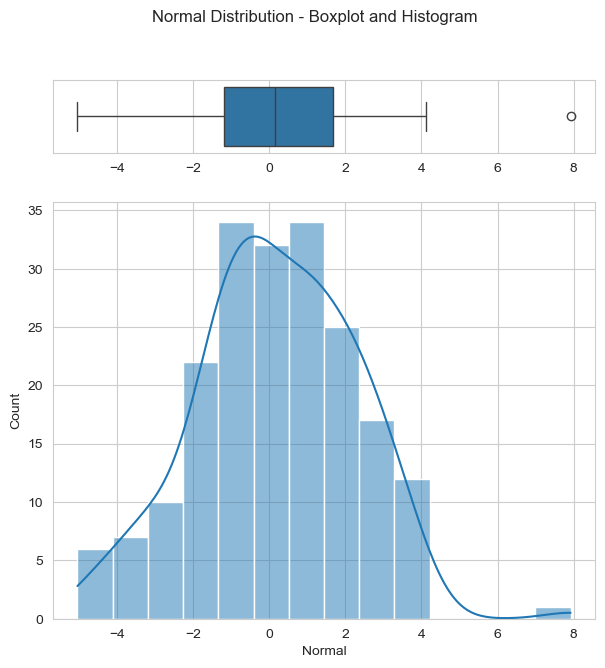

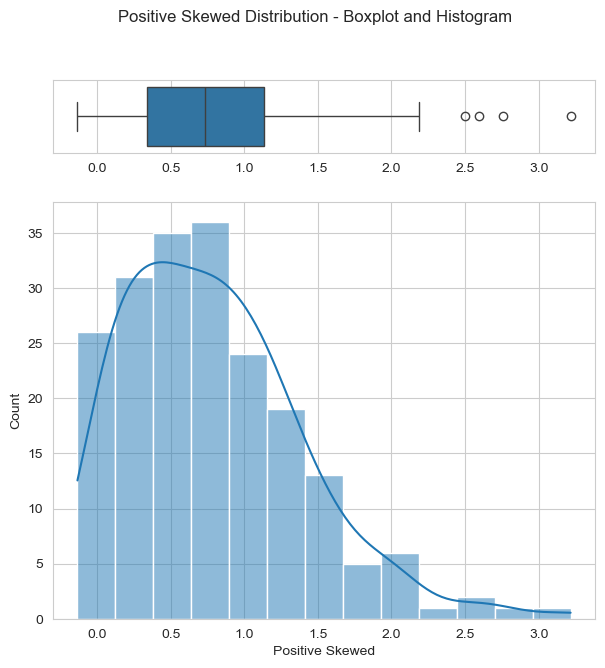

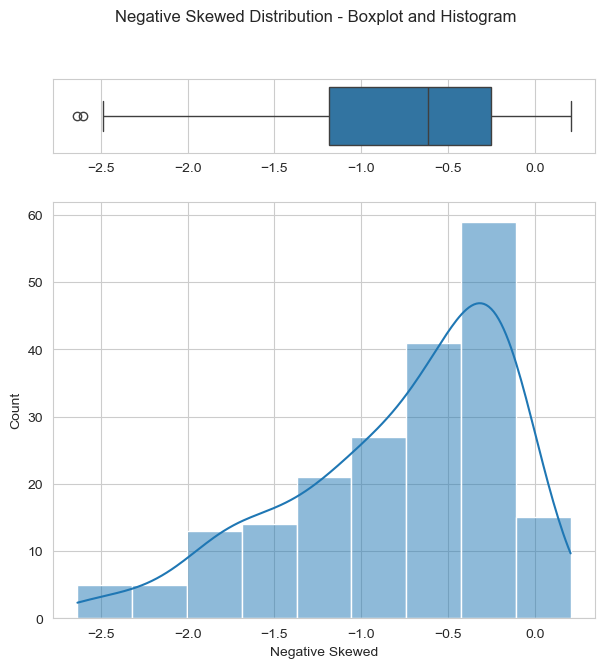

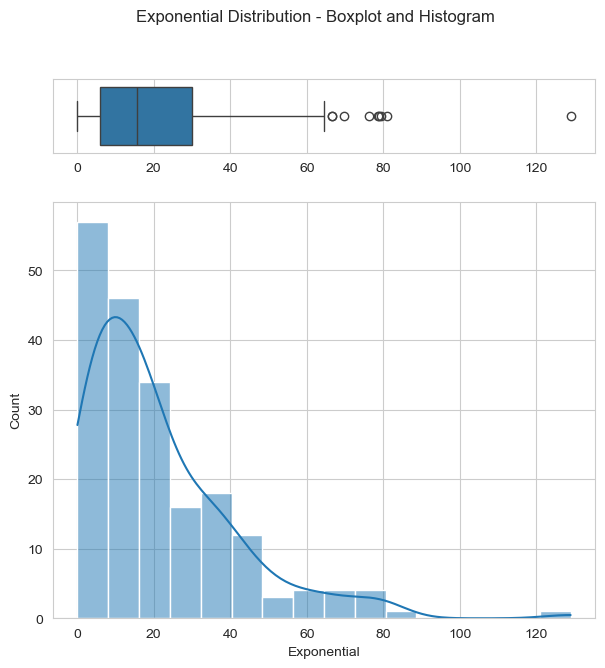

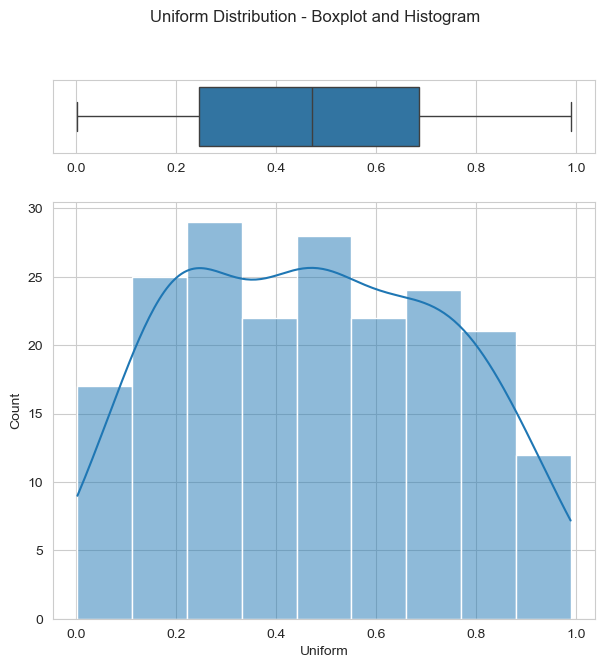

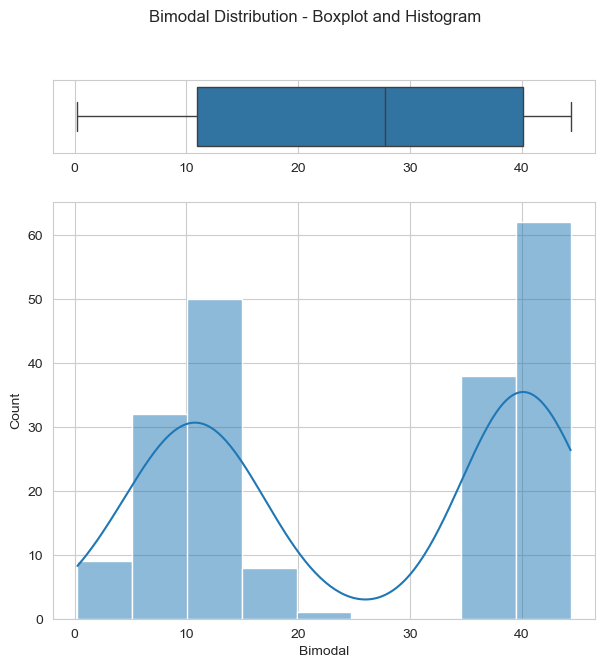

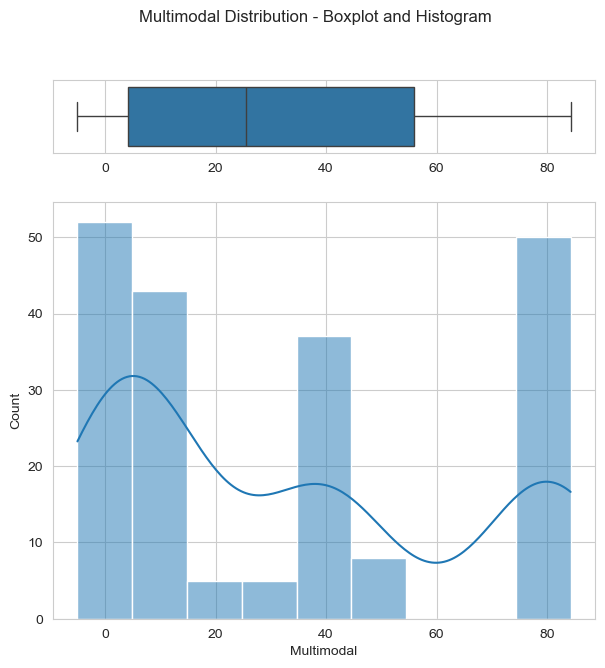

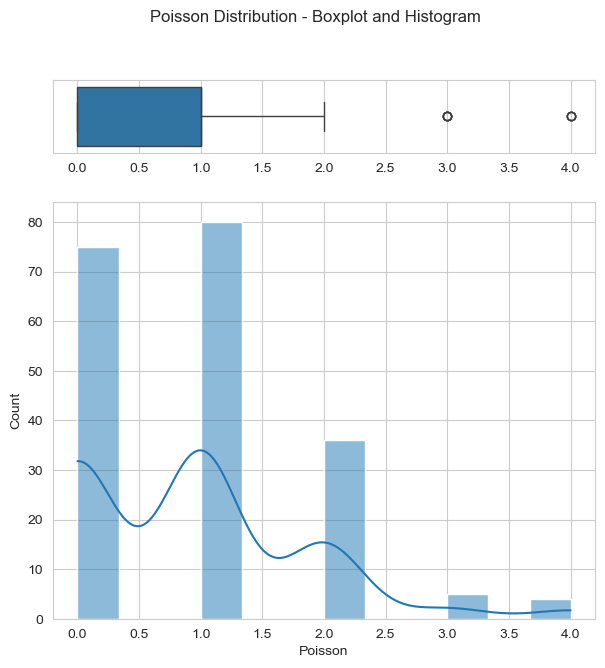

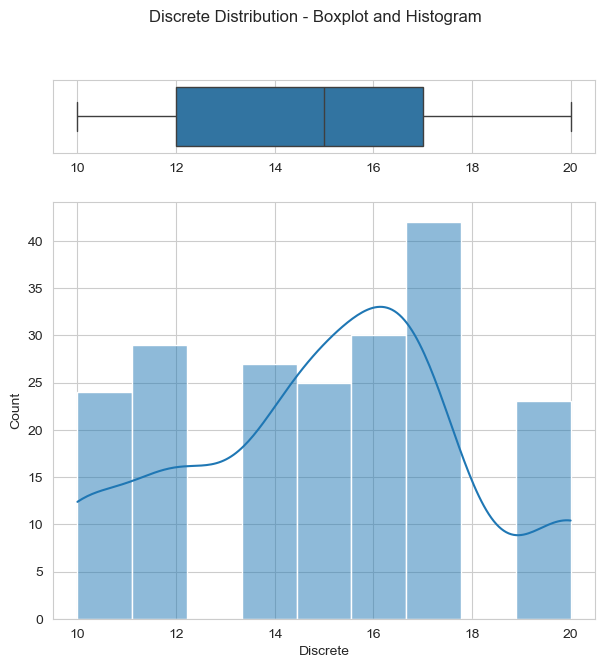

In [20]:
for col in df.columns:
  fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
  sns.boxplot(data=df, x=col, ax=axes[0])
  axes[0].set_xlabel(" ")
  sns.histplot(data=df, x=col, kde=True, ax=axes[1])
  fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
  plt.show()
  print("\n\n")

We can test if all numerical columns in a DataFrame are normally distributed with `pg.normality()`. The function documentation is [here](https://pingouin-stats.org/build/html/index.html#test-the-normality-of-the-data). The arguments we parse are: `data`, `alpha=0.05` for the significance level
* The output shows in the ``index`` each variable name and in the ``normal`` column whether a given variable is normally distributed or not.

In [24]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Normal,0.988677,1.138580e-01,True
Positive Skewed,0.942788,4.038894e-07,False
Negative Skewed,0.918364,4.423817e-09,False
Exponential,0.838932,1.286833e-13,False
Uniform,0.968244,1.724490e-04,False
Bimodal,0.790214,1.158851e-15,False
Multimodal,0.843655,2.137806e-13,False
Poisson,0.817142,1.403161e-14,False
Discrete,0.931506,4.456337e-08,False


Consider the dataset below: It has records for three different species of penguins collected from 3 islands in the Palmer Archipelago, Antarctica

In [29]:
df_pinguins = sns.load_dataset('penguins')
print(df_pinguins.shape)
df_pinguins.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


You can check if `bill_length_mm` (numerical variable) is normally distributed across `species` (categorical variable)
* We add the `dv` (dependent variable) as `bill_length_mm` and `group` (grouping variable) as `species`
  - `dv` — the column you're testing for normality. Here, you're checking if bill_length_mm follows a normal distribution.
* We note that only `bill_length_mm` in `Gentoo` species is not normally distributed
* `alpha=0.5`
  This is the significance level — the usual 5% threshold to decide if the result is statistically significant.

In [32]:
pg.normality(data=df_pinguins, dv='bill_length_mm', group='species', alpha=0.05)

,W,pval,normal
species,,,
Adelie,0.993362,0.716601,True
Chinstrap,0.975250,0.194093,True
Gentoo,0.972722,0.013491,False


However, you will notice that `bill_length_mm` itself is not normally distributed

In [36]:
pg.normality(data=df_pinguins['bill_length_mm'], alpha=0.05)

,W,pval,normal
bill_length_mm,0.974855,0.000011,False


You can plot a histogram for `bill_length_mm`, and `bill_length_mm` per `species` to make sense of the distribution plot/shape and the shapiro results
* `bill_length_mm` variable is not normally distributed
* when you analyse `bill_length_mm` per species, Gentoo's `bill_length_mm` is not normally distributed

**Note** The visuals may mislead you; what matters is the result of the statistical test

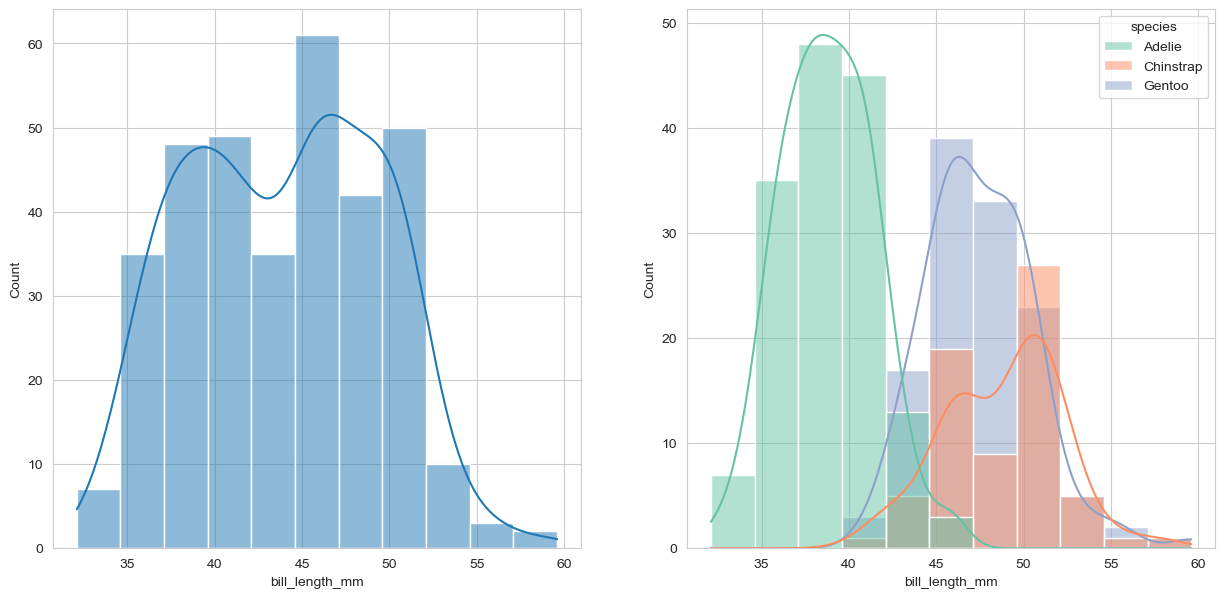

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.histplot(data=df_pinguins, x='bill_length_mm', kde=True, ax=axes[0])
sns.histplot(data=df_pinguins, x='bill_length_mm',hue='species' , kde=True, palette='Set2', ax=axes[1])
plt.show();
print("\n\n")

### Chi-Squared Test (Goodness of Fit)

**Chi-Squared Test measures if there is a significant difference between the expected frequencies and the observed frequencies in categorical variables**

* Hypothesis
  * `Null hypothesis` – there is no difference in the frequency or the proportion of occurrences in each category
  * `Alternate hypothesis` - there is a difference in the frequency or proportion of occurrences in each 

Let's consider a built-in dataset from pingouin. It is a study on heart disease, where the target equals one, which indicates heart disease.

In [45]:
df = pg.read_dataset('chi2_independence')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's check target (heart disease) distribution with `.value_counts()`

In [48]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Let's take target and fbs (that looks to define fasting blood sugar)
* We ask ourselves, is fbs a good predictor for the target (heart disease)? Is there any significant association between them?

Let's make a barplot to investigate `fbs` levels across different `target` levels
* That shows the distribution of people that have/don't have heart disease and have/don't have fbs
* It visually looks that the distribution of people with and without heart disease is similar to people with different fbs levels

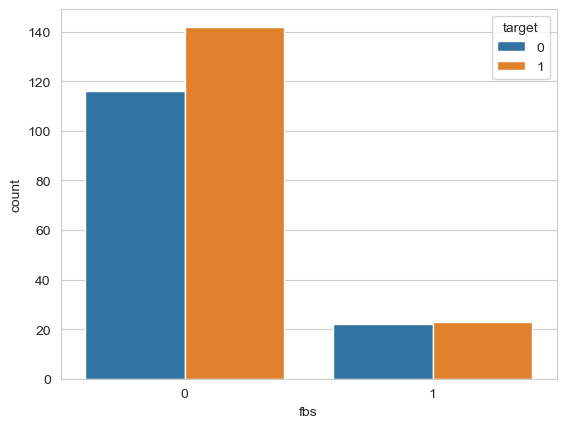

In [51]:
sns.countplot(x='fbs',hue='target',data=df)
plt.show()

We use `pg.chi2_independence()` to conduct Chi Square Test. The documentation link is [here](https://pingouin-stats.org/generated/pingouin.chi2_independence.html#pingouin.chi2_independence). The arguments we use are:
* data, x and y as the variables for the chi squared test. y tends to be the target variable you are interested in analysing across a given feature (x)

In [54]:
expected, observed, stats = pg.chi2_independence(data=df, x='fbs', y='target')

The test summary (`stats`), has the result of the Pearson Chi-Square test

In [57]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.106273,1.0,0.744428,0.018728,0.062261
1,cressie-read,0.666667,0.106201,1.0,0.744511,0.018722,0.062253
2,log-likelihood,0.000000,0.106069,1.0,0.744664,0.018710,0.062237
3,freeman-tukey,-0.500000,0.105979,1.0,0.744769,0.018702,0.062227
4,mod-log-likelihood,-1.000000,0.105897,1.0,0.744865,0.018695,0.062217
5,neyman,-2.000000,0.105755,1.0,0.745030,0.018682,0.062201


We are interested in the ``pval`` from the ``pearson`` test.
* We ``query`` from stats where `test == pearson` and grab `pval`

In [60]:
stats.query("test == 'pearson'")['pval']

0    0.744428
Name: pval, dtype: float64

We consider our significance level alpha = 0.05. 
* Since ``p-value`` (0.744428) is greater than the alpha, we accept the null hypothesis.
* Therefore there was not a significant association between `fbs` and `target`. 
  * `fbs` is not indicated to be a good predictor for `target`

Now let's take `target` and `sex`

* We ask ourselves, is `sex` a good predictor for the `target` (heart disease)?
*  Is there any significant association between them?

Let's make a barplot to investigate `sex` levels across different `target` levels
* It visually looks that no heart disease (target = 0) proportion in one sex is different than the other.

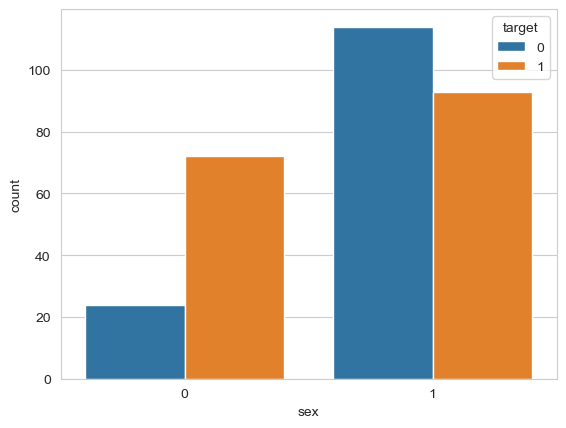

In [64]:
sns.countplot(data=df, x='sex', hue='target')
plt.show()

We conduct the Chi-Squared Test, where now `x='sex'`

In [67]:
expected, observed, stats = pg.chi2_independence(data=df, x='sex', y='target')

And extract `p-value` using the same rationale from the previous exercise

In [72]:
stats.query("test == 'pearson'")['pval']

0    0.000002
Name: pval, dtype: float64

We consider our significance level alpha = 0.05.
* Since pvalue (0.000002) is smaller than the alpha, we reject the null hypothesis.

* Therefore there was a significant association between `sex` and `target`.
  *  `sex` is indicated to be a good predictor for  the `target` (heart disease)